<a href="https://colab.research.google.com/github/uol-mediaprocessing-202021/medienverarbeitung-b-color-and-tone-correction/blob/develop/Canny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Canny Edge Dectection**
After the slider variant worked, the group considered that the foreground should be separated from the background. The idea behind this was that the landscapes and objects in the foreground should stand out even more from the background. The automatic color adjustment should strengthen the foreground and only slightly enhance the background. Furthermore, this should prevent the sky from being seen as an object, so that it does not look unnatural after color correction. 

Accordingly, the group searched for different edge detection algorithms to first highlight the objects of an image and then distinguish between foreground and background. Among other things, the group came across John F Canny's Canny Edge Dectection algorithm.  



## Description
The Canny Edge Dectection algorithm is an edge detection algorithm that is used for image noise removal and the precise localization of edges within an image. Originally, this algorithm was developed only for edge detection in gray-scale images, but now, by separating individual color components, it can also be applied to color images. The Canny Algorithm has the advantage that it does not only want to achieve three goals at the same time, but also determines connected chains of edge elements, which should facilitate the post-processing. At its core, the Canny algorithm, like many others, uses the gradient method. This algorithm can be divided into several steps. 

In the first step, the three separated color components red, green, blue are smoothed using a Gaussian filter of width σ to suppress the noise effects of the original image. After that, the image is filtered with a Sobel kernel in horizontal and vertical direction. Now the first derivatives *Gx* and *Gy* can be derived. With the help of these derivatives now the edge gradients, as well as the directions of the pixels can be determined.

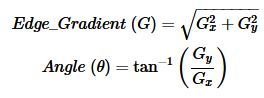

After the gradient and the directions of the pixels have been determined, all pixels that do not belong to an edge are removed. To find out whether a pixel belongs to an edge, the neighboring pixel is checked for a local maximum and minimum. If the neighboring pixel is a minimum or maximum, the pixel actually examined is still considered as an edge pixel. If no neighbor is a minimum or maximum, the edge pixel is set to 0.  

Last but not least, it is determined whether the remaining pixels that would form an edge are relevant for the algorithm or not. For this, two threshold values *minVal* and *maxVal* have to be set. If the maximum of the pixel exceeds the threshold value *maxVal*, it is certainly a relevant edge pixel. If a maximum is below the threshold *minVal*, then the edge is not relevant and is discarded. If a maximum is between the thresholds, then it is unclear whether the edge is a relevant edge or not.  

In [1]:
import cv2
import math
import numpy as np
import sys
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## Example 1

In this example, you can clearly see that the Canny algorithm perceives the edges of the palm tree and the fence more strongly than the mountains that can be seen in the background or the sea. All larger black areas and all areas where the edges are very thin, such as the mountains, represent the background.


In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/landscape/00000116_(4).jpg')
RGB_src = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

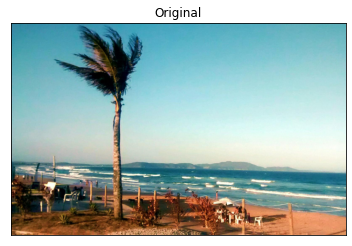

In [ ]:
plt.figure()
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.imshow(RGB_src)
plt.show()

In [ ]:
canny = cv2.Canny(img, 200,400)

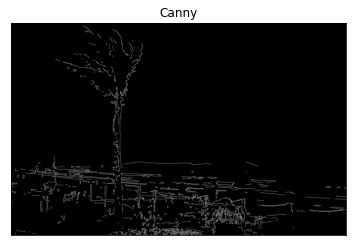

In [ ]:
plt.figure()
plt.title("Canny"), plt.xticks([]), plt.yticks([])
plt.imshow(canny, 'gray')
plt.show()

## Example 2

With the image from example 2, the group had tested some limits. This is a plant shimmying broadly along a surface. Here it is difficult to tell what is the foreground and what is the background. The group thought that the leaves and branches should be the foreground and the surface the background.
In the first Canny version, it is clear that the detection of the edges is not clear. The lower leaves disappear completely and only in the middle some edges of the branches are detected. This can be due to the fact that the two threshold values minVal and maxVal were chosen too high and thus many possible edge pixels are not recognized as edge pixels.
Accordingly, the filter would be applied over the image again, but this time with lower thresholds. The result is that the edges are displayed more strongly, but still the edges of the leaves are not clearly recognizable or which edges belong to the leaves.  

In [ ]:
img2 = cv2.imread('/content/gdrive/MyDrive/Zurich-RAW-to-DSLR-Dataset/full_resolution/huawei_visualized/691.png')
RGB_src2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

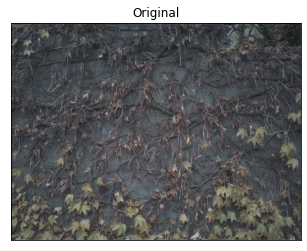

In [ ]:
plt.figure()
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.imshow(RGB_src2)
plt.show()

In [ ]:
canny2a = cv2.Canny(img2, 200,400)

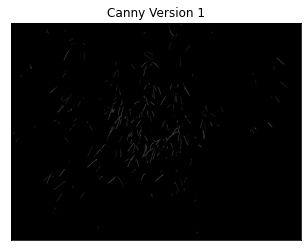

In [ ]:
plt.figure()
plt.title("Canny Version 1"), plt.xticks([]), plt.yticks([])
plt.imshow(canny2a, 'gray')
plt.show()

In [ ]:
canny2b = cv2.Canny(img2, 100,200)

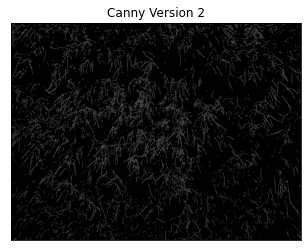

In [ ]:
plt.figure()
plt.title("Canny Version 2"), plt.xticks([]), plt.yticks([])
plt.imshow(canny2b, 'gray')
plt.show()

## Example 3
The third example wasn't as challenging as the second example. The edges of the objects in the foreground were quickly and, for the most part, clearly detected. Again, the thresholds chosen for the second Canny version of the second example weren't useful in this image. The edges are too dense, as can be seen in version 1. It is clear where which object should be, but for example the edges of the human are hardly distinguishable from the path. The same applies to the edges of the two trees on the right side. 
Accordingly, a Canny algorithm was applied again, but this time with higher thresholds. In the result, the edges of the foreground are clearly visible.  

In [ ]:
img3 = cv2.imread('/content/gdrive/MyDrive/landscape/00000002.jpg')
RGB_src3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

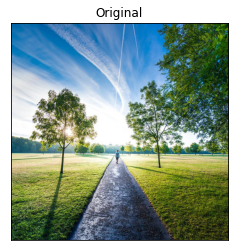

In [ ]:
plt.figure()
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.imshow(RGB_src3)
plt.show()

In [ ]:
canny3a = cv2.Canny(img3, 100,200)

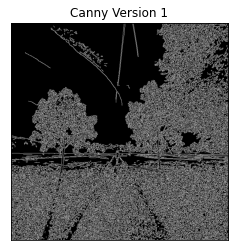

In [ ]:
plt.figure()
plt.title("Canny Version 1"), plt.xticks([]), plt.yticks([])
plt.imshow(canny3a, 'gray')
plt.show()

In [ ]:
canny3b=cv2.Canny(img3, 250,500)

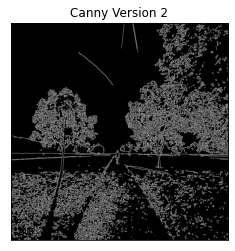

In [ ]:
plt.figure()
plt.title("Canny Version 2"), plt.xticks([]), plt.yticks([])
plt.imshow(canny3b, 'gray')
plt.show()

# Example 4

In [34]:
img4 = cv2.imread('/content/gdrive/MyDrive/landscape/00000150_(6).jpg')
RGB_src = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

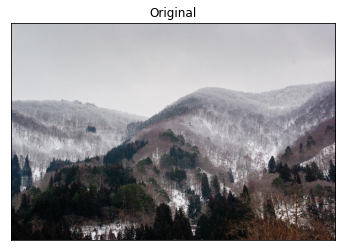

In [35]:
plt.figure()
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.imshow(RGB_src)
plt.show()

In [36]:
canny4a = cv2.Canny(img4, 250,500)

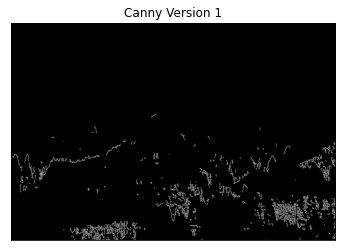

In [37]:
plt.figure()
plt.title("Canny Version 1"), plt.xticks([]), plt.yticks([])
plt.imshow(canny4a, 'gray')
plt.show()

In [38]:
canny4b = cv2.Canny(img4, 100,200)

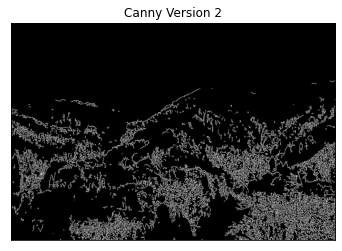

In [39]:
plt.figure()
plt.title("Canny Version 2"), plt.xticks([]), plt.yticks([])
plt.imshow(canny4b, 'gray')
plt.show()

# Example 5

In [47]:
img5 = cv2.imread('/content/gdrive/MyDrive/Zurich-RAW-to-DSLR-Dataset/full_resolution/huawei_visualized/190.png')
RGB_src = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

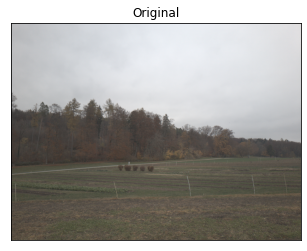

In [48]:
plt.figure()
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.imshow(RGB_src)
plt.show()

In [51]:
canny5a = cv2.Canny(img5, 100,200)

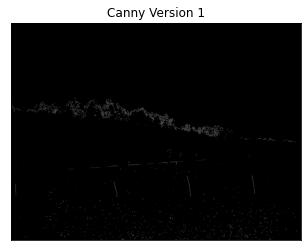

In [52]:
plt.figure()
plt.title("Canny Version 1"), plt.xticks([]), plt.yticks([])
plt.imshow(canny5a, 'gray')
plt.show()

In [61]:
canny5b = cv2.Canny(img5, 50,100)

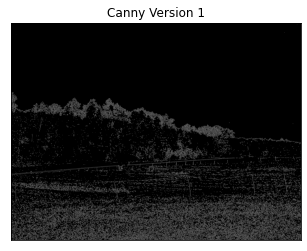

In [62]:
plt.figure()
plt.title("Canny Version 1"), plt.xticks([]), plt.yticks([])
plt.imshow(canny5b, 'gray')
plt.show()

# Conclusion

The Canny algorithm is not suitable for every image, as example 2 proved. Not always all edges of all objects are detected unambiguously. Furthermore, the thresholds for edge detection have to be adjusted again depending on the image. Therefore, the group decided to discontinue the Canny algorithm approach and to search for an edge detection algorithm that directly and unambiguously separates the foreground objects from the background.